In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [20]:
from sklearn import preprocessing

In [27]:
bdata=pd.read_csv('D:/Machine Learning/breast.csv')
bdata.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [28]:
bdata.fillna(bdata.mean())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
bdata.shape

(569, 32)

In [30]:
bdata.drop_duplicates(inplace = True)

In [31]:
bdata.shape

(569, 32)

In [32]:
bdata.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
cl={'M':1,'B':0}

bdata['diagnosis']=bdata['diagnosis'].map(cl)

In [43]:
dataset = bdata.values
dataset


array([[8.4230200e+05,           nan, 1.7990000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05,           nan, 2.0570000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07,           nan, 1.9690000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05,           nan, 1.6600000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05,           nan, 2.0600000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04,           nan, 7.7600000e+00, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [86]:
# Get all of the rows from the all columns of the dataset
X = dataset[:,0:31] 
# Get all of the rows from the last column
y = dataset[:,31] 

In [87]:
cl={'M':1,'B':0}

bdata['diagnosis']=bdata['diagnosis'].map(cl)

In [88]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


array([[9.14760426e-04,            nan, 5.21037437e-01, ...,
        5.68610224e-01, 9.12027491e-01, 5.98462448e-01],
       [9.14996350e-04,            nan, 6.43144493e-01, ...,
        1.92971246e-01, 6.39175258e-01, 2.33589592e-01],
       [9.24954884e-02,            nan, 6.01495575e-01, ...,
        3.59744409e-01, 8.35051546e-01, 4.03705894e-01],
       ...,
       [1.00765069e-03,            nan, 4.55251077e-01, ...,
        2.71805112e-01, 4.87285223e-01, 1.28720678e-01],
       [1.00796562e-03,            nan, 6.44564343e-01, ...,
        7.49760383e-01, 9.10652921e-01, 4.97141731e-01],
       [9.22636984e-05,            nan, 3.68687586e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.57441356e-01]])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)
model = Sequential([
    Dense(15, activation='relu', input_shape=( 31 ,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )


In [92]:
model.fit(X_train, y_train,
          batch_size=57, epochs=1000, validation_split=0.2)

Train on 364 samples, validate on 91 samples
Epoch 1/1000
364/364 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/1000
364/364 [==============================] - 0s 84us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/1000
364/364 [==============================] - 0s 69us/step - los

364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 112/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 113/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 114/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 115/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 116/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 117/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan

Epoch 166/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 167/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 168/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 169/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 170/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 171/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 172/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 221/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 222/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 223/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 224/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 225/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 226/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 227/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 276/1000
364/364 [==============================] - 0s 82us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 277/1000
364/364 [==============================] - 0s 80us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 278/1000
364/364 [==============================] - 0s 77us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 279/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 280/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 281/1000
364/364 [==============================] - 0s 80us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 282/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 331/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 332/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 333/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 334/1000
364/364 [==============================] - 0s 74us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 335/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 336/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 337/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 386/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 387/1000
364/364 [==============================] - 0s 49us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 388/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 389/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 390/1000
364/364 [==============================] - 0s 74us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 391/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 392/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 441/1000
364/364 [==============================] - 0s 74us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 442/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 443/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 444/1000
364/364 [==============================] - 0s 49us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 445/1000
364/364 [==============================] - 0s 49us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 446/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 447/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 496/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 497/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 498/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 499/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 500/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 501/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 502/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 551/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 552/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 553/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 554/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 555/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 556/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 557/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 606/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 607/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 608/1000
364/364 [==============================] - 0s 49us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 609/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 610/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 611/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 612/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 661/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 662/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 663/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 664/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 665/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 666/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 667/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 716/1000
364/364 [==============================] - 0s 80us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 717/1000
364/364 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0000e+0 - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 718/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 719/1000
364/364 [==============================] - 0s 69us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 720/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 721/1000
364/364 [==============================] - 0s 71us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 722/1000
364/364 [==============================] - 0s 7

Epoch 771/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 772/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 773/1000
364/364 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 774/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 775/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 776/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 777/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 826/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 827/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 828/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 829/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 830/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 831/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 832/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 881/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 882/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 883/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 884/1000
364/364 [==============================] - 0s 60us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 885/1000
364/364 [==============================] - 0s 52us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 886/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 887/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 936/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 937/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 938/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 939/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 940/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 941/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 942/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 

Epoch 991/1000
364/364 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 992/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 993/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 994/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 995/1000
364/364 [==============================] - 0s 49us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 996/1000
364/364 [==============================] - 0s 55us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 997/1000
364/364 [==============================] - 0s 58us/step - loss: nan - accuracy: 0.0000e+00 

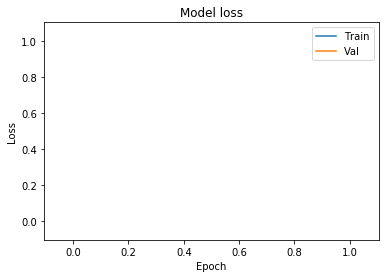

In [51]:
#visualize the training loss and the validation loss to see if the model is overfitting
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()*/

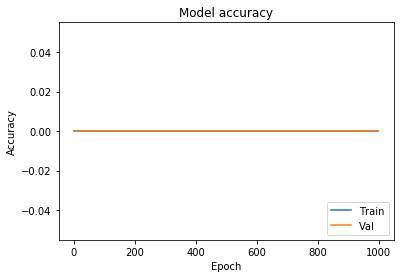

In [53]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'], loc='lower right')
#plt.show()

In [93]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1.0 if y>=0.5 else 0.0 for y in prediction] #Threshold
print(prediction)
print(y_test)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.08764 0.09349 0.09929 0.07484 0.06469 0.05972 0.08523 0.06784 0.09353
 0.1175  0.06589 0.07686 0.06639 0.07662 0.09638 0.07842 0.08763 0.08203
 0.06777 0.07538 0.07087 0.06484 0.1048  0.07628 0.07009 0.08113 0.07881
 0.08269 0.08317 0.07729 0.06592 0.1009  0.08851 0.07603 0.07764 0.0987
 0.06559 0.1072  0.07944 0.08911 0.06836 0.09211 0.09136 0.09208 0.06263
 0.08557 0.05871 0.07277 0.09209 0.173   0.0895  0.08187 0.06306 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
